<a href="https://colab.research.google.com/github/Lakshana002/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [4]:
X_train = np.loadtxt('/content/input.csv', delimiter = ',')
Y_train = np.loadtxt('/content/labels.csv', delimiter = ',')

X_test = np.loadtxt('/content/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('/content/labels_test.csv', delimiter = ',')

In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


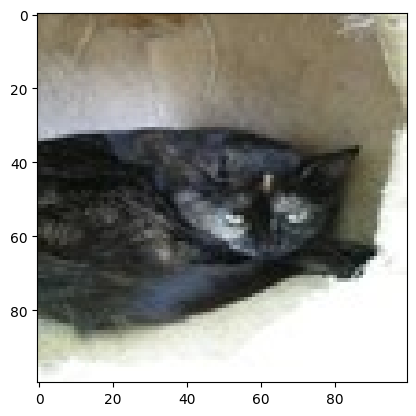

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [9]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 957ms/step - accuracy: 0.8393 - loss: 0.3830
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 993ms/step - accuracy: 0.8712 - loss: 0.3237
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8927 - loss: 0.2703
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9125 - loss: 0.2230
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 952ms/step - accuracy: 0.9407 - loss: 0.1812


In [15]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.6502 - loss: 0.9460


[0.8216556310653687, 0.6899999976158142]

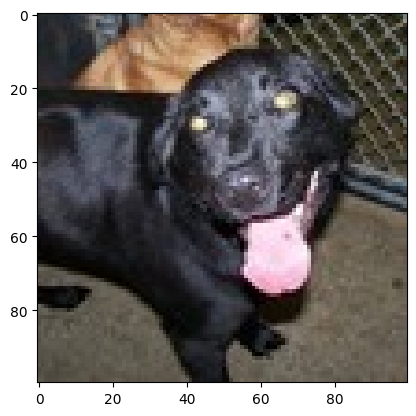

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Our model says it is a : dog


In [16]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)